In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HLA-GRAPH.csv to HLA-GRAPH.csv


In [ ]:
import pandas as pd
df = pd.read_csv('ROC-AUC.csv', delimiter=',', quotechar='"')
df.to_csv('new.csv', index=False)
print(df.head())


      peptide         HLA  immunogenicity  actual label
0  LIYDSSLCDL  HLA-B*0702        0.263094             1
1   FLWGPRALV  HLA-B*0702        0.945508             4
2   YMDGTMSQV  HLA-A*2402        0.287004             1
3   YLEPGPVTA  HLA-A*0201        0.982948             4
4   YMDGTMSQV  HLA-B*0702        0.448822             1


In [ ]:
import pandas as pd
data = pd.read_csv('new.csv')

print(data.head())

      peptide         HLA  immunogenicity  actual label
0  LIYDSSLCDL  HLA-B*0702        0.263094             1
1   FLWGPRALV  HLA-B*0702        0.945508             4
2   YMDGTMSQV  HLA-A*2402        0.287004             1
3   YLEPGPVTA  HLA-A*0201        0.982948             4
4   YMDGTMSQV  HLA-B*0702        0.448822             1


In [ ]:

data['immunogenicity'] = pd.to_numeric(data['immunogenicity'], errors='coerce')

# PARAMETER CNN
def classify_immunogenicity(score):
    if score >= 0.9:
        return 4
    elif 0.8 <= score < 0.9:
        return 3
    elif 0.7 <= score < 0.8:
        return 2
    elif 0.5 <= score < 0.7:
        return 1
    else:
        return 0

# Kolum Prediksi with label
data['predicted_label'] = data['immunogenicity'].apply(classify_immunogenicity)
print(data)


         peptide         HLA  immunogenicity  actual label  predicted_label
0     LIYDSSLCDL  HLA-B*0702        0.263094             1                0
1      FLWGPRALV  HLA-B*0702        0.945508             4                4
2      YMDGTMSQV  HLA-A*2402        0.287004             1                0
3      YLEPGPVTA  HLA-A*0201        0.982948             4                4
4      YMDGTMSQV  HLA-B*0702        0.448822             1                0
...          ...         ...             ...           ...              ...
3273   AIYKQSQHM  HLA-A*2402        0.633485             1                1
3274   EYLDDRNTF  HLA-C*0701        0.821332             3                3
3275   LYAWEPSFL  HLA-B*0702        0.638368             1                1
3276   VYGFVRACL  HLA-B*0702        0.291406             2                0
3277   VYAETKHFL  HLA-B*0702        0.400484             2                0

[3278 rows x 5 columns]


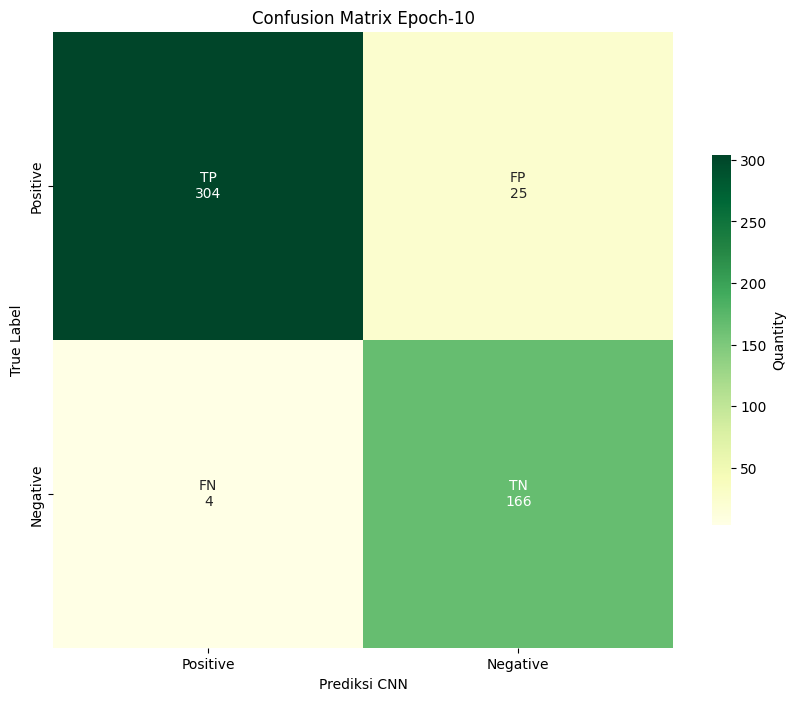

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

actual_labels = data['actual label']
predicted_labels = data['predicted_label']

def classify_prediction(actual, predicted):
    if actual == predicted:
        if actual > 0:
            return 'TP'
        else:
            return 'TN'
    elif actual > 0 and predicted > 0:
        return 'FP'
    elif actual > 0 and predicted == 0:
        return 'FN'
    else:
        return 'FP'

TP = FP = FN = TN = 0
for actual, predicted in zip(actual_labels, predicted_labels):
    result = classify_prediction(actual, predicted)
    if result == 'TP':
        TP += 1
    elif result == 'FP':
        FP += 1
    elif result == 'FN':
        FN += 1
    elif result == 'TN':
        TN += 1

cm = np.array([[TP, FP], [FN, TN]])
cm_with_labels = np.array([
    [f"TP\n{TP}", f"FP\n{FP}"],
    [f"FN\n{FN}", f"TN\n{TN}"]
])

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm, annot=cm_with_labels, fmt='', cmap='YlGn',
                      xticklabels=["Positive", "Negative"],
                      yticklabels=["Positive", "Negative"],
                      cbar=True, cbar_kws={'label': 'Quantity', 'shrink': 0.6})

plt.xlabel('Prediksi CNN')
plt.ylabel('True Label')
plt.title('Confusion Matrix Epoch-10')
plt.show()


In [ ]:
# Contoh data
accuracy_list = [0.28, 0.18, 0.20, 0.23, 0.34, 0.50, 0.68, 0.70, 0.87, 0.91]
precision_list = [0.23, 0.17, 0.21, 0.23, 0.40, 0.50, 0.64, 0.72, 0.90, 0.92]
recall_list = [0.63, 0.53, 0.61, 0.36, 0.53, 0.69, 0.85, 0.82, 0.94, 0.97]
f1_list = [0.34, 0.26, 0.32, 0.28, 0.45, 0.58, 0.73, 0.77, 0.92, 0.94]
spesifisitas_list = [0.14, 0.05, 0.03, 0.13, 0.14, 0.31, 0.49, 0.52, 0.63, 0.71]

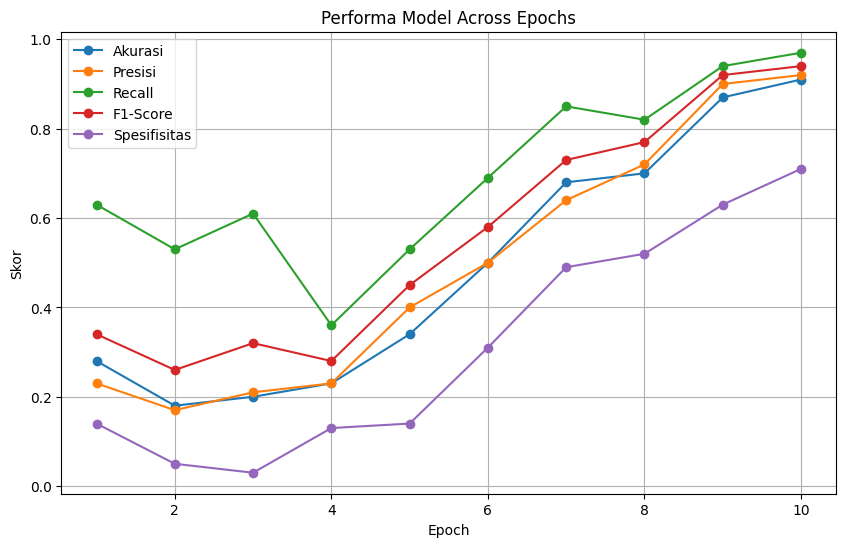

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
epochs = np.arange(1, 11)

# test grafik
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_list, label='Akurasi', marker='o')
plt.plot(epochs, precision_list, label='Presisi', marker='o')
plt.plot(epochs, recall_list, label='Recall', marker='o')
plt.plot(epochs, f1_list, label='F1-Score', marker='o')
plt.plot(epochs, spesifisitas_list, label='Spesifisitas', marker='o')


plt.xlabel('Epoch')
plt.ylabel('Skor')
plt.title('Performa Model Across Epochs')
plt.legend(loc='best')
plt.grid(True)

plt.show()7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


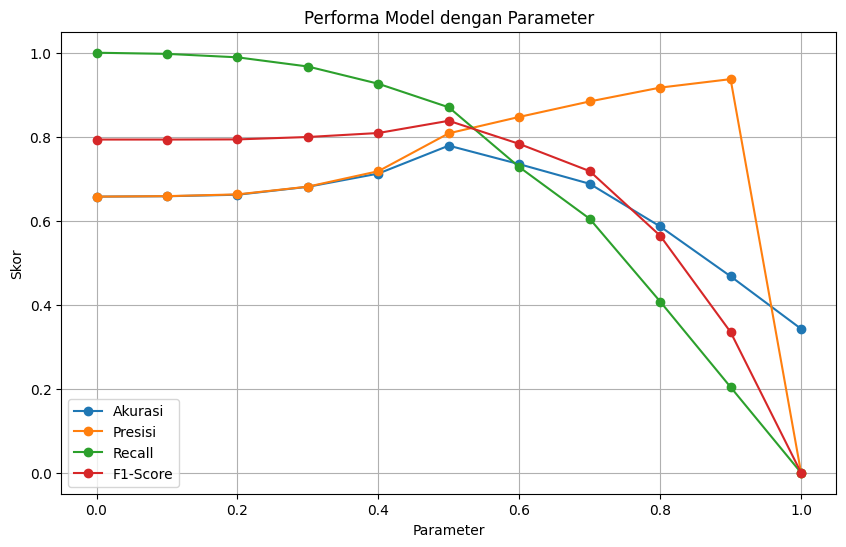

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.1, 0.1)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for threshold in thresholds:
    data['predicted_label'] = data['immunogenicity'].apply(lambda x: 1 if x >= threshold else 0)

    accuracy = accuracy_score(data['actual_label'], data['predicted_label'])
    precision = precision_score(data['actual_label'], data['predicted_label'])
    recall = recall_score(data['actual_label'], data['predicted_label'])
    f1 = f1_score(data['actual_label'], data['predicted_label'])
1
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Akurasi', marker='o')
plt.plot(thresholds, precision_list, label='Presisi', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1-Score', marker='o')

plt.xlabel('Parameter')
plt.ylabel('Skor')
plt.title('Performa Model dengan Parameter')
plt.legend(loc='best')
plt.grid(True)

plt.show()
#save for later

In [ ]:
import pandas as pd

data['immunogenicity'] = pd.to_numeric(data['immunogenicity'], errors='coerce')

def classify_immunogenicity(score):
    if score >= 0.9:
        return 4
    elif 0.8 <= score < 0.9:
        return 3
    elif 0.7 <= score < 0.8:
        return 2
    elif 0.5 <= score < 0.7:
        return 1
    else:
        return 0

data['predicted_label'] = data['immunogenicity'].apply(classify_immunogenicity)

data.to_csv('astungkara.csv', index=False)

print("saved to 'astungkara.csv'")

Data has been saved to 'updated1_data.csv'


y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (328, 5)
y_pred_fold shape: (328,)
y_scores_fold shape: (328, 5)
y_true_fold shape: (327, 5)
y_pred_fold shape: (327,)
y_scores_fold shape: (327, 5)
y_true_fold shape: (327, 5)
y_pred_fold shape: (327,)
y_scores_fold shape: (327, 5)


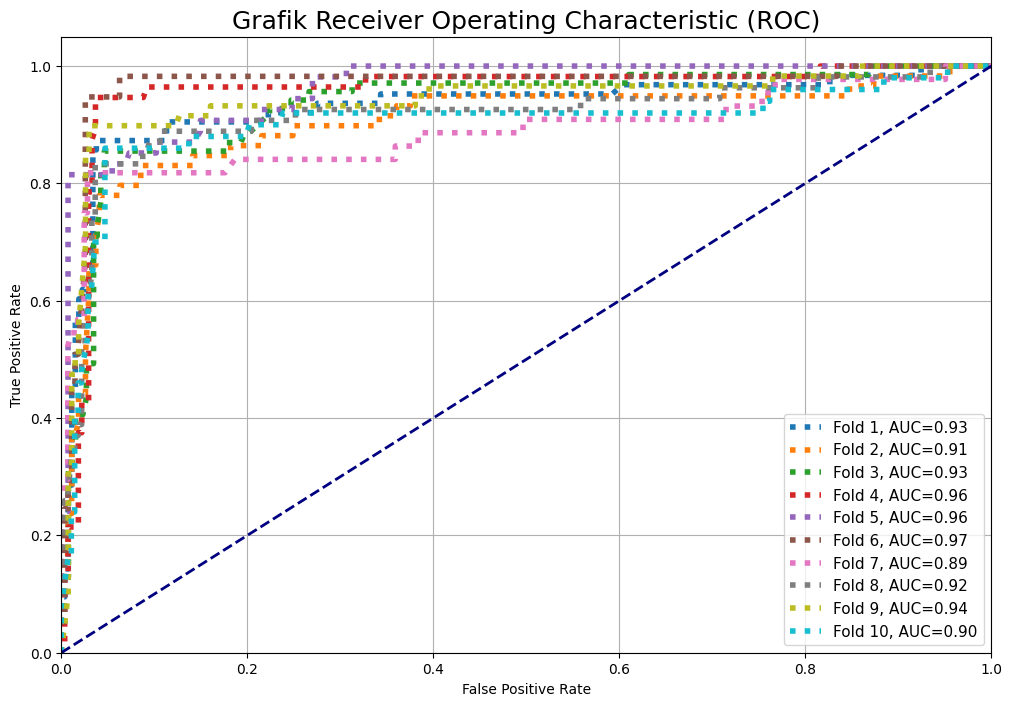

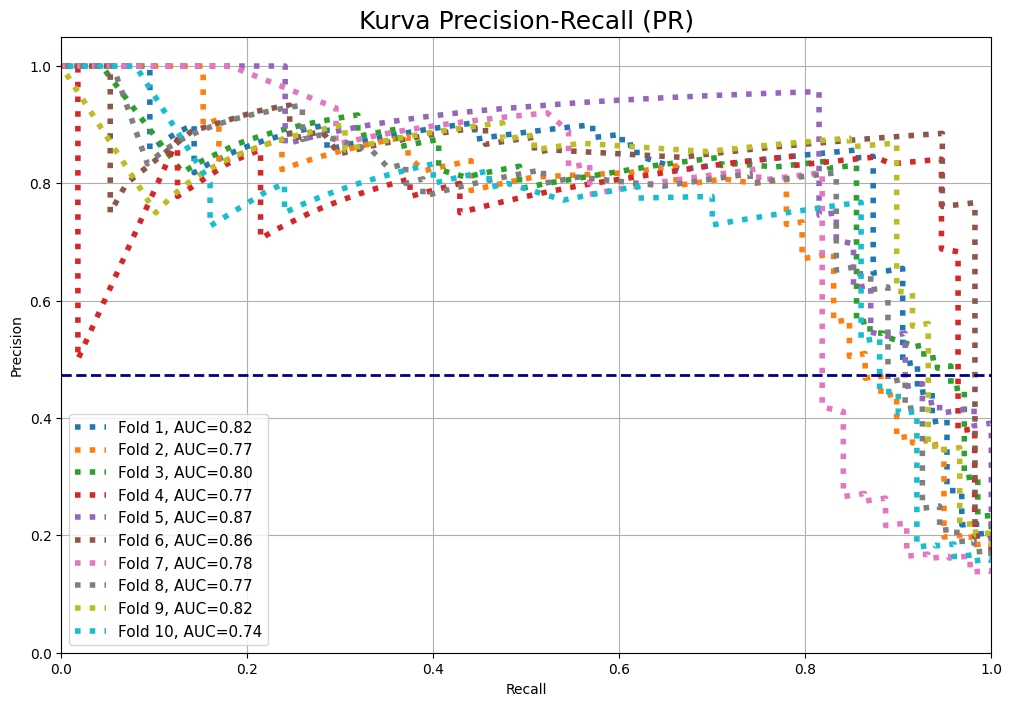

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold


df = pd.read_csv('astungkara.csv', delimiter=',', quotechar='"')

y_true = df['actual label']
y_pred = df['immunogenicity']


classes = np.unique(y_true)
y_true_bin = label_binarize(y_true, classes=classes)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

bucket_roc = []
bucket_pr = []

for train_index, test_index in kf.split(y_true_bin):
    y_true_fold = y_true_bin[test_index]
    y_pred_fold = y_pred.iloc[test_index]
    y_scores_fold = np.zeros((len(y_true_fold), len(classes)))
    for i, score in enumerate(y_pred_fold):
        y_scores_fold[i, :] = score
    print(f"y_true_fold shape: {y_true_fold.shape}")
    print(f"y_pred_fold shape: {y_pred_fold.shape}")
    print(f"y_scores_fold shape: {y_scores_fold.shape}")


    fpr_fold, tpr_fold, _ = roc_curve(y_true_fold[:, 4], y_scores_fold[:, 4])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    bucket_roc.append((fpr_fold, tpr_fold, roc_auc_fold, f'Fold {len(bucket_roc) + 1}'))

    precision, recall, _ = precision_recall_curve(y_true_fold[:, 4], y_scores_fold[:, 4])
    pr_auc_fold = auc(recall, precision)
    bucket_pr.append((precision, recall, pr_auc_fold, f'Fold {len(bucket_pr) + 1}'))


fig, ax = plt.subplots(figsize=(12,8))
for fpr, tpr, auc_value, fold in bucket_roc:
    ax.plot(fpr, tpr, lw=4, linestyle=':', label=f'{fold}, AUC={auc_value:.2f}')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Grafik Receiver Operating Characteristic (ROC)',fontsize=18)
ax.legend(loc="lower right", fontsize=11)
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12,8))
for precision, recall, auc_value, fold in bucket_pr:
    ax.plot(recall, precision, lw=4, linestyle=':', label=f'{fold}, AUC={auc_value:.2f}')
ax.plot([0, 1], [baseline, baseline], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Kurva Precision-Recall (PR)',fontsize=18)
ax.legend(loc="lower left", fontsize=11)
ax.grid(True)
plt.show()


In [ ]:
#SAMPEL
print("Sampel Label true:")
print("True Labels:", y_true_bin[:10])
print("Predicted Scores:", y_scores_fold[:10])


Sample of True Labels and Scores:
True Labels: [[0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Predicted Scores: [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
import tensorflow as tf  # type: ignore
import tensorflow.keras as keras  # type: ignore
from tensorflow.keras import layers  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import argparse
import os

def seperateCNN():
    input1 = keras.Input(shape=(10, 12, 1))
    input2 = keras.Input(shape=(46, 12, 1))

    x = layers.Conv2D(filters=16, kernel_size=(2, 12))(input1)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Conv2D(filters=32, kernel_size=(2, 1))(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPool2D(pool_size=(2, 1), strides=(2, 1))(x)

    x = layers.Flatten()(x)
    x = keras.Model(inputs=input1, outputs=x)

    y = layers.Conv2D(filters=16, kernel_size=(15, 12))(input2)     # 32
    y = layers.BatchNormalization()(y)
    y = keras.activations.relu(y)
    y = layers.MaxPool2D(pool_size=(2, 1), strides=(2, 1))(y)  # 16
    y = layers.Conv2D(filters=32, kernel_size=(9, 1))(y)    # 8
    y = layers.BatchNormalization()(y)
    y = keras.activations.relu(y)
    y = layers.MaxPool2D(pool_size=(2, 1), strides=(2, 1))(y)  # 4
    y = layers.Flatten()(y)
    y = keras.Model(inputs=input2, outputs=y)

    combined = layers.concatenate([x.output, y.output])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.2)(z)
    z = layers.Dense(1, activation='sigmoid')(z)

    model = keras.Model(inputs=[input1, input2], outputs=z)
    return model
    model = seperateCNN()
    model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 46, 12, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 10, 12, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 1, 16)      │          2,896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 9, 1, 16)       │            400 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 1, 16)      │             64 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 9, 1, 16)       │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 32, 1, 16)      │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 9, 1, 16)       │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 1, 16)      │              0 │ re_lu_2[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 8, 1, 32)       │          1,056 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 8, 1, 32)       │          4,640 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 8, 1, 32)       │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 8, 1, 32)       │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 8, 1, 32)       │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 8, 1, 32)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 4, 1, 32)       │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 42,401 (165.63 KB)

 Trainable params: 42,209 (164.88 KB)

 Non-trainable params: 192 (768.00 B)

          HLA  immunogenicity
0  HLA-A*0201        0.673077
1  HLA-A*2402        0.641711
2  HLA-B*0702        0.656675
3  HLA-C*0701        0.703258


<ipython-input-9-ce5c14763b12>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='immunogenicity', y='HLA', data=hla_avg_scores, palette='viridis')


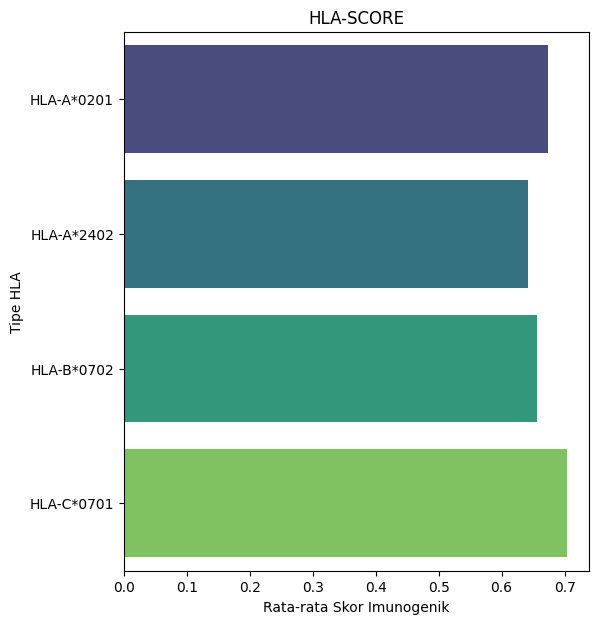

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

file_path = 'HLA-GRAPH.csv'
df = pd.read_csv(file_path)

if not os.path.exists('hla_plots'):
    os.makedirs('hla_plots')

hla_avg_scores = df.groupby('HLA')['immunogenicity'].mean().reset_index()

print(hla_avg_scores)

plt.figure(figsize=(6, 7))
barplot = sns.barplot(x='immunogenicity', y='HLA', data=hla_avg_scores, palette='viridis')

plt.xlabel('Rata-rata Skor Imunogenik')
plt.ylabel('Tipe HLA')
plt.title('HLA-SCORE')


plt.savefig('hla_plots/thin.png', bbox_inches='tight')
plt.show()


Processing HLA: HLA-B*0702
      peptide         HLA  immunogenicity
0  LIYDSSLCDL  HLA-B*0702         0.26309
1   FLWGPRALV  HLA-B*0702         0.94551
4   YMDGTMSQV  HLA-B*0702         0.44882
5   ALLAVGATK  HLA-B*0702         0.72248
7   YLSGANLNL  HLA-B*0702         0.67648
Processing HLA: HLA-A*2402
      peptide         HLA  immunogenicity
2   YMDGTMSQV  HLA-A*2402         0.28700
10  TYACFVSNL  HLA-A*2402         0.41124
19  AAAAAIFVI  HLA-A*2402         0.47651
28  YQGSYGFRL  HLA-A*2402         0.35674
43  YMDGTMSQV  HLA-A*2402         0.28700
Processing HLA: HLA-A*0201
       peptide         HLA  immunogenicity
3    YLEPGPVTA  HLA-A*0201         0.98295
6    YLSGANLNL  HLA-A*0201         0.62442
9   QYSWFVNGTF  HLA-A*0201         0.40266
12   LLLLTVLTV  HLA-A*0201         0.72952
13   LLLLTVLTV  HLA-A*0201         0.72952
Processing HLA: HLA-C*0701
        peptide         HLA  immunogenicity
114   ELAEYLYNI  HLA-C*0701         0.79378
115  RMMEYGTTMV  HLA-C*0701         0.4036

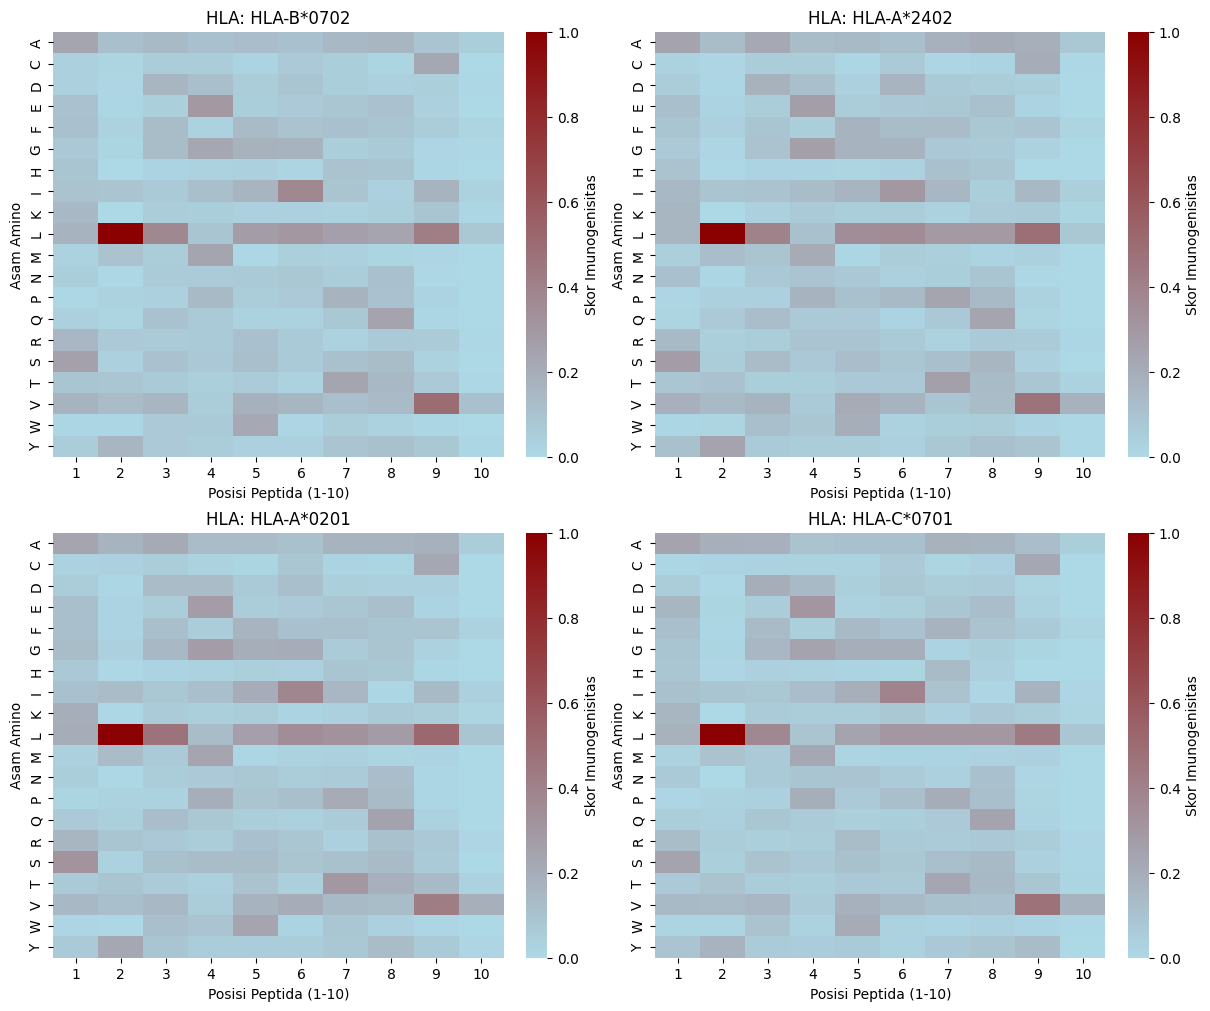

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

file_path = 'HLA-GRAPH.csv'
df = pd.read_csv(file_path)

hla_types = df['HLA'].unique()
amino_acids = sorted(set(''.join(df['peptide'])))

if not os.path.exists('hla_plots'):
    os.makedirs('hla_plots')

cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_blue_to_red', ['lightblue', 'darkred'])

num_plots = len(hla_types)
ncols = 2
nrows = (num_plots + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5), constrained_layout=True)

for i, hla in enumerate(hla_types):
    ax = axes[i // ncols, i % ncols]
    matrix = np.zeros((len(amino_acids), 10))

    hla_data = df[df['HLA'] == hla]

    print(f"Processing HLA: {hla}")
    print(hla_data.head())

    for _, row in hla_data.iterrows():
        peptide = row['peptide']
        score = row['immunogenicity']

        for pos, aa in enumerate(peptide):
            if pos < 10 and aa in amino_acids:
                row_index = amino_acids.index(aa)
                matrix[row_index, pos] += score

    max_val = matrix.max()
    if max_val > 0:
        matrix /= max_val

    heatmap_df = pd.DataFrame(matrix, index=amino_acids, columns=range(1, 11))

    sns.heatmap(heatmap_df, annot=False, cmap=cmap, cbar_kws={'label': 'Skor Imunogenisitas'},
                ax=ax, vmin=0, vmax=1)
    ax.set_xlabel('Posisi Peptida (1-10)')
    ax.set_ylabel('Asam Amino')
    ax.set_title(f'HLA: {hla}')


for j in range(num_plots, nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])


plt.savefig('hla_plots/custom_heatmaps_combined.png')
plt.show()
